In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
import pylab
from pylab import arange,pi,sin,cos,sqrt
from ipywidgets import interactive, interact_manual, widgets
import warnings
warnings.filterwarnings('ignore')
from parameters_plots import *

pylab.rcParams.update(params)

# Laboratorio 1

## Problema 1

Considere el siguiente modelo representativo del mercado del bien $A$.

**Supuestos:**

* Cantidad demandada del bien $A\left(Q^{D}\right)$  depende negativamente del precio del bien $A\left(P_{A}\right)$; negativamente del precio de sus bienes complementarios $\left(P_{C}\right)$ positivamente del precio de los bienes sustitutos $\left(P_{S}\right)$; positivamente del nivel de ingreso $(m)$

In [3]:
def Q_D(P_a, P_c, P_s, m): return (1-P_a)**2*(1-P_c)*sqrt(m)*P_s

def Q_S(P_a, P_i): return (1-P_i)**3*P_a**2;

Si consideramos que la demanda del bien $A$ es una función del precio del bien $\left(P_{A}\right)$, el precio de sus bienes complementarios $\left(P_{C}\right)$ y substitutos $\left(P_{s}\right)$ y del nivel ingreso $(m)$; este supuesto se traduce en:

* $Q^D(P_A, P_C, P_S, m)$ es __decreciente__ en $P_A$ y $P_C$ y __creciente__ en $P_S$ y $m$.

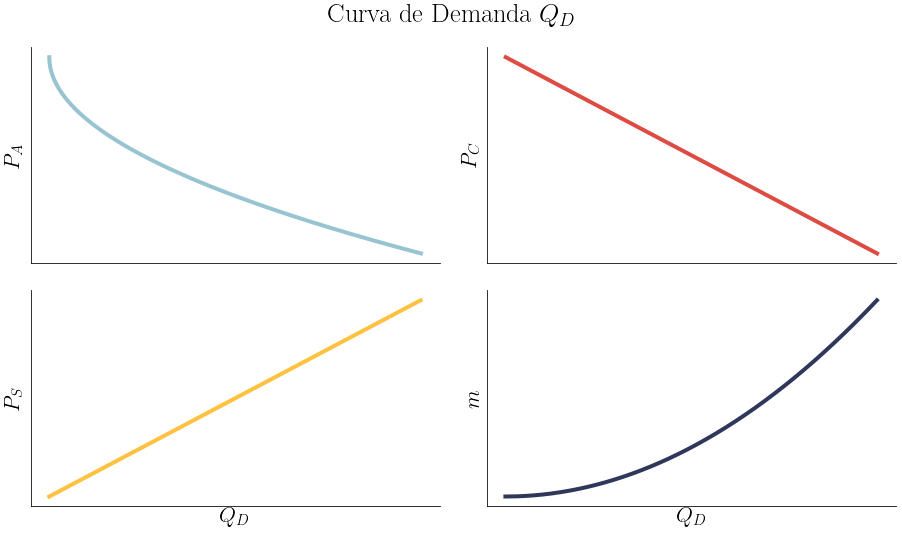

In [4]:
fig, ax = plt.subplots(2,2, figsize=(13,8), sharex=True)

ax = ax.reshape(-1)


x = pylab.arange(0,1,0.001)

y = [Q_D(x,0,1,1), Q_D(0,x,1,1), Q_D(0,0,x,1), Q_D(0,0,1,x)] 

colors = ["#98C4D1", "#DE4B43", "#FEC240", "#2F375B"]
ylabels = ["$P_A$", "$P_C$", "$P_S$", "$m$"]
for i in range(4):
    
    ax[i].plot(y[i], x , color=colors[i], lw=4)
    if i >= 2:
        ax[i].set_xlabel("$Q_D$")
    else:
        ax[i].set_xlabel("")
    ax[i].set_xticks([])
    ax[i].set_ylabel(ylabels[i])
    ax[i].set_yticks([])
    
plt.suptitle("Curva de Demanda $Q_D$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

* Si $Q_D$ es diferenciable entonces:
$$\frac{\partial Q_D}{\partial P_A} < 0, \quad \frac{\partial Q_D}{\partial P_C} < 0, \quad 
\frac{\partial Q_D}{\partial P_S} > 0, \quad \frac{\partial Q_D}{\partial m} > 0$$

**Supuestos:**

* Cantidad demandada del bien $A\left(Q^{D}\right)$  depende negativamente del precio del bien $A\left(P_{A}\right)$; negativamente del precio de sus bienes complementarios $\left(P_{C}\right)$ positivamente del precio de los bienes sustitutos $\left(P_{S}\right)$; positivamente del nivel de ingreso $(m)$

* Cantidad ofrecida del bien $A\left(Q^{S}\right)$ : depende positivamente del precio del bien $A\left(P_{A}\right) ;$ negativamente del precio de los insumos del bien $A\left(P_{I}\right)$

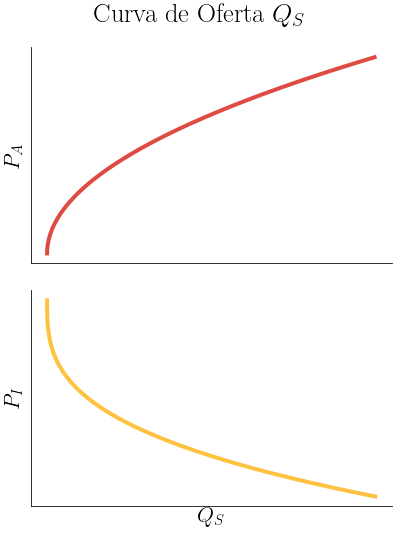

In [5]:
fig, ax = plt.subplots(2,1, figsize=(6,8), sharex=True)

ax = ax.reshape(-1)


x = pylab.arange(0,1,0.001)

ax[0].plot(Q_S(x,0), x ,color="#DE4B43", lw=4)
ax[0].set_xlabel("")
ax[0].set_xticks([])
ax[0].set_ylabel("$P_A$")
ax[0].set_yticks([])


ax[1].plot(Q_S(1,x), x ,  color="#FEC240", lw=4)
ax[1].set_xlabel("$Q_S$")
ax[1].set_xticks([])
ax[1].set_ylabel("$P_I$")
ax[1].set_yticks([])

plt.suptitle("Curva de Oferta $Q_S$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

La demanda del bien $A$ es una función del precio del bien, y los insumos que se utilizan para producirlo entonces

* $Q_S(P_A, P_I)$ es **creciente** en $P_A$ y **decreciente** en $P_I$.

$$\frac{\partial Q_D}{\partial P_A} > 0, \quad \frac{\partial Q_S}{\partial P_I} < 0$$

**Supuestos:**

* Cantidad demandada del bien $A\left(Q^{D}\right)$  depende negativamente del precio del bien $A\left(P_{A}\right)$; negativamente del precio de sus bienes complementarios $\left(P_{C}\right)$ positivamente del precio de los bienes sustitutos $\left(P_{S}\right)$; positivamente del nivel de ingreso $(m)$

* Cantidad ofrecida del bien $A\left(Q^{S}\right)$ : depende positivamente del precio del bien $A\left(P_{A}\right) ;$ negativamente del precio de los insumos del bien $A\left(P_{I}\right)$

* El precio del bien $A$ se ajusta para equilibrar la oferta y la demanda.

_Principio de Equlibrio:_ Los precios se ajustan hasta que la cantidad demandada es igual a la cantidad ofertada.

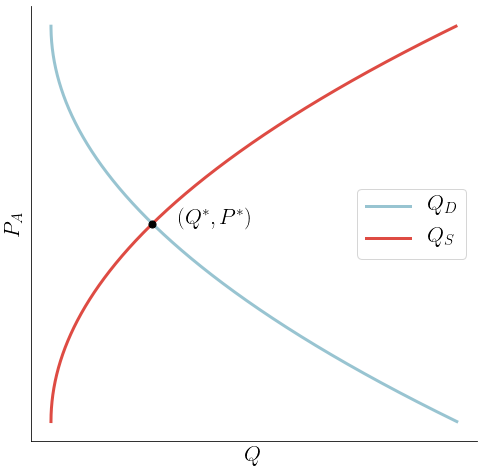

In [6]:
# font_size = 16
# P_range = 0:0.001:1
plt.figure(figsize=(8, 8))
plt.plot(Q_D(x,0,1,1), x,  color="#98C4D1", lw=3, zorder=0, label="$Q_D$")
plt.plot(Q_S(x,0), x, color="#DE4B43", lw=3, zorder=0, label="$Q_S$")
plt.xlabel("$Q$")
plt.xticks([])
plt.ylabel("$P_A$")
plt.yticks([])
ax = plt.gca()


P_eq = 1/2
Q_eq = Q_S(1/2,0)
plt.scatter([Q_eq], [P_eq], color="black", s=50, zorder=2)
plt.legend()
plt.annotate("$(Q^*, P^*)$", (Q_eq+1/16, P_eq))
plt.show()

### Parte a

Suponga que se produce un incremento en el precio de un bien complementario a $A .$ Represente gráficamente (en el mercado del bien $A$ ) la situación y muestre cómo se ven afectados el precio y la cantidad de equilibrio del bien $A$

Si incrementa el precio de un bien complementario a $A$ entonces:
* $A$ se hace menos atractivo.
* Por lo tanto cae la demanda de este bien.
* Sin embargo la oferta no depende del precio de los bienes complementarios.
* Por tanto la oferta se mantiene igual.
* Por tanto el precio y la cantidad de equilibrio caen.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def comparative_statics_1(P_c):
    tol = 0.02
    P_eq = 1/2
    Q_eq = Q_S(1/2,0)
    
    P_eq_N = (sqrt(1-P_c)+P_c-1)/P_c 
    Q_eq_N = Q_D(P_eq_N, P_c, 1,1)
    
    plt.figure(figsize=(15, 9))    
    plt.plot(Q_D(x,0,1,1), x,   color="#98C4D1", lw=3, label="$Q_D$", zorder=0)#,
    plt.ylabel(""); plt.xlabel("");
    if abs(P_eq_N-P_eq)<tol:        
        plt.xticks([Q_eq], ["$Q_0^*$"]); plt.yticks([P_eq], ["$P_0^*$"])
    else:
        plt.xticks([Q_eq, Q_eq_N], ["$Q_0^*$", "$Q_1^*$"]); plt.yticks([P_eq, P_eq_N], ["$P_0^*$", "$P_1^*$"])
    plt.xlim((0,1/2)); plt.ylim((0,1))

    plt.plot(Q_S(x,0), x, lw=3, color= "#DE4B43", label="$Q_S$", zorder=0)
    
    plt.plot(Q_D(x,P_c,1,1), x, color="#98C4D1", lw=2, linestyle="--", zorder=0)
    
    
    plt.scatter([Q_eq], [P_eq], color="black", s = 40, zorder=2)
    plt.plot([Q_eq, Q_eq],[0, P_eq], alpha=0.5, color="black", linestyle="dotted")
    plt.plot([0, Q_eq],[P_eq, P_eq], alpha=0.5, color="black", linestyle="dotted")
    
    if abs(P_eq_N-P_eq)>tol:
        plt.scatter([Q_eq_N], [P_eq_N], color="black", s = 40, zorder=2)
        plt.plot([Q_eq_N, Q_eq_N],[0, P_eq_N], alpha=0.5, color="black", linestyle="dotted")
        plt.plot([0, Q_eq_N],[P_eq_N, P_eq_N], alpha=0.5, color="black", linestyle="dotted")
    
        color_dif_P = "#50B6AB" if (P_eq - P_eq_N > 0)  else "#F4B30F"
        color_dif_Q = "#50B6AB" if (Q_eq - Q_eq_N > 0)  else "#F4B30F"
        plt.plot([0, 0], [P_eq, P_eq_N], lw=10, color=color_dif_P, label="")
        plt.plot([Q_eq, Q_eq_N], [0, 0], lw=10, color=color_dif_Q, label="")    

    plt.title("Estática comparativa cuando cambia $P_C$")
    plt.legend()
    plt.show()
    
interactive_plot = interactive(comparative_statics_1,
                               P_c=widgets.FloatSlider(min=-2, max=.99, step=0.1, description='$P_C$'))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='$P_C$', max=0.99, min=-2.0), Output()), _dom_classes…

### Parte b

Suponga que simultáneamente se produce un alza en el precio de los insumos del bien $A$ y un incremento en el precio de los bienes sustitutos de $A$. Represente gráficamente (en el mercado del bien $A$) la situación y muestre cómo se ven afectados el precio y la cantidad de equilibrio del bien $A$.

Un alza en el precio de los insumos del bien $A$ implica:
* Cae la oferta del bien.
* Esto no afecta la demanda.
* Debería aumentar el precio del bien.

Por otra parte al aumentar el precio de los bienes substitutos:
* $A$ se hace mas deseable.
* Aumenta la demanda.
* Aumenta el precio.

Ambos efectos van en el mismo sentido.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def comparative_statics_2(P_i, P_s):
    tol = 0.02
    P_eq = 1/2
    Q_eq = Q_S(1/2,0)
    
    P_eq_N =(P_s - sqrt(P_s-3*P_s*P_i+3*P_s*P_i**2-P_s*P_i**3))/(P_i**3-3*P_i**2+3*P_i+P_s-1)
    Q_eq_N = Q_D(P_eq_N, 0, P_s,1)
    
    plt.figure(figsize=(15, 9))    
    plt.plot(Q_D(x,0,1,1), x,   color="#98C4D1", lw=3, label="$Q_D$", zorder=0)#,
    plt.ylabel(""); plt.xlabel("");
    if abs(P_eq_N-P_eq)<tol:        
        plt.xticks([Q_eq], ["$Q_0^*$"]); plt.yticks([P_eq], ["$P_0^*$"])
    else:
        plt.xticks([Q_eq, Q_eq_N], ["$Q_0^*$", "$Q_1^*$"]); plt.yticks([P_eq, P_eq_N], ["$P_0^*$", "$P_1^*$"])
    plt.xlim((0,1/2)); plt.ylim((0,1))

    plt.plot(Q_S(x,0), x, lw=3, color= "#DE4B43", label="$Q_S$", zorder=0)
    
    plt.plot(Q_D(x,0,P_s,1), x, color="#98C4D1", lw=2, linestyle="--", zorder=0)
    plt.plot(Q_S(x,P_i), x, color="#E26F46", lw=2, linestyle="--", zorder=0)
    
#     plot!(Q_D.(P_range,0,P_s,1), P_range, color="#98C4D1", lw=2, linestyle=:dash, label="")
#     plot!(Q_S.(P_range,P_i), P_range, color="#E26F46", lw=2, linestyle=:dash, label="")
    
    plt.scatter([Q_eq], [P_eq], color="black", s = 40, zorder=2)
    plt.plot([Q_eq, Q_eq],[0, P_eq], alpha=0.5, color="black", linestyle="dotted")
    plt.plot([0, Q_eq],[P_eq, P_eq], alpha=0.5, color="black", linestyle="dotted")
    
    if abs(P_eq_N-P_eq)>tol:
        plt.scatter([Q_eq_N], [P_eq_N], color="black", s = 40, zorder=2)
        plt.plot([Q_eq_N, Q_eq_N],[0, P_eq_N], alpha=0.5, color="black", linestyle="dotted")
        plt.plot([0, Q_eq_N],[P_eq_N, P_eq_N], alpha=0.5, color="black", linestyle="dotted")
    
        color_dif_P = "#50B6AB" if (P_eq - P_eq_N > 0)  else "#F4B30F"
        color_dif_Q = "#50B6AB" if (Q_eq - Q_eq_N > 0)  else "#F4B30F"
        plt.plot([0, 0], [P_eq, P_eq_N], lw=10, color=color_dif_P, label="")
        plt.plot([Q_eq, Q_eq_N], [0, 0], lw=10, color=color_dif_Q, label="")    

    plt.title("Estática comparativa cuando cambian $P_S$ y $P_I$")
    plt.legend()
    plt.show()

interactive_plot = interactive(comparative_statics_2,
                               P_s=widgets.FloatSlider(value=1, min=0.2, max=5, step=0.1, description='$P_S$'),
                               P_i=widgets.FloatSlider(min=-1, max=1, step=0.1, description='$P_I$'))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='$P_I$', max=1.0, min=-1.0), FloatSlider(value=1.0, d…

### Parte c

Muestre cómo sería la representación gráfica de la curva de demanda del consumidor en el espacio $\left(Q^{D}, m\right)$ y cómo se vería afectada esta curva cuando se produce un incremento en el precio del bien $A$.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def comparative_statics_2(P_a):
    
    plt.figure(figsize=(15, 9))    
    plt.plot(Q_D(1/2,0,1,x), x,   color="#98C4D1", lw=3, label="$Q_D$", zorder=0)#,
    plt.ylabel("$Q_D$"); plt.xlabel("$m$");
    plt.xlim((0,1/4)); plt.ylim((0,1))
    plt.plot(Q_D(P_a,0,1,x), x, color="#98C4D1", lw=2, linestyle="--", zorder=0)
    plt.xticks([]), plt.yticks([])
    plt.title("Estática comparativa del cambio de $P_A$")
    
    plt.show()

interactive_plot = interactive(comparative_statics_2,
                               P_a=widgets.FloatSlider(value=1/2, min=0, max=1, step=0.1, description='$P_A$'))
                               
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='$P_A$', max=1.0), Output()), _dom_classes=('widget-i…

## Problema 2

Pruebe que, bajo los supuestos del Ejercicio Nro. 1, un incremento en el precio del bien complementario a $A$ hace caer el precio de equilibrio en el mercado del bien $A$

El precio de equilibrio es tal que:


$$P_A^* \quad \implies \quad Q^D(P_A^*,P^c_1,\cdot) = Q^S(P_A^*,\cdot)$$

Si el precio del bien complementario incrementa:

$$P^c_1 \rightarrow P^{c}_2 \quad \text{donde} \quad P^c_1 < P^{c}_2$$

$Q^D$ decrece:

$$Q^D(P^*,P^c_2\cdot) < Q^D(P^*,P^c_1\cdot) = Q^S(P^*, \cdot)$$

Entonces para mantener la condición de equilibrio (oferta igual a demanda) tiene que haber un cambio de precio:

La idea es que para compenzar la diferencia:

$$Q^D(P^*,P^c_2\cdot) < Q^S(P^*, \cdot)$$

tenemos que aumentar $Q^D$ y disminuir $Q^S$. Esto se logra mediante una disminución del precio $P^*$.

## Problema 3

El mercado de entradas para escuchar a la orquesta sinfónica puede describirse por medio de las siguientes curvas de demanda y oferta:

$$
q^{D}=20000-90 p
$$

$$
q^{S}=10000+110 p
$$

Los amantes de la música clásica convencen al parlamento de que imponga un precio máximo de $\$ 40$ por entrada ¿Consigue esta política que aumente el número de personas que asisten a conciertos de música clásica o que disminuya? Explique.

Calculamos primero el precio y las cantidades de equilibrio _(donde se igualan la oferta y la demanda):_

$$
q^{D}=q^{S} \quad \implies \quad 20000-90 p=10000+110 p \quad \implies \quad 200p = 10000
\quad \implies \quad p^* = 50
$$

$$\implies q^D(p^*) = 15500 = q^S(p^*)$$


Ahora supongamos que el nuevo precio fijo entra en vigor:

Veamos que sucede con la demanda de entradas:

$$
q^D(40) = 20000 - 90 \times 40 = 16400 > 15500 = q^D(p^*)$$

$$
\qquad \implies \qquad \text{la demanda aumenta}
$$

Sin embargo al analizar la oferta:

$$
q^S(40) = 10000 + 110 \times 40 = 14400 < 15500 = q^D(p^*)$$

$$
\qquad \implies \qquad \text{la oferta disminuye}
$$

## Problema 4

Suponga que la curva de demanda de pizza puede representarse por medio de la ecuación $Q^{D}=20-2 P,$ donde $Q^{D}$ es la cantidad demandada y $P$ es el precio. La curva de oferta de pizza puede representarse por medio de la ecuación $Q^{S}=P-1,$ donde $Q^{S}$ es la cantidad ofrecida. Suponga que el gobierno establece un impuesto de $\$ 3$ por pizza ¿Cuánto más pagarán ahora los consumidores por una pizza?

Consideremos primero el precio de equilibrio:
$$Q^D=Q^S \quad \implies \quad 20-2 P = P-1 \quad \implies 3P=21 $$

$$\quad \implies \quad P^* = \$7$$

Ahora supongamos que entra en efecto el impuesto y veamos que sucede con la curva de oferta (inversa):

_Curva antes de impuesto:_
$$P(Q) = Q + 1$$
_Curva depúes de impuesto:_
$$P(Q) = Q + 1 + 3 = Q + 4$$

Con la curva de oferta inversa podemos obtner la nueva curva de oferta:
$$Q^S = P - 4$$

Ahora tenemos que encontrar el nuevo precio de equilibrio:

$$ Q^S = Q^D \quad\implies \quad P - 4 = 20-2 P $$

$$\implies P^{**} = 8$$ 

**Notemos** que el nuevo precio de equilibrio está entre el viejo precio de equibirio $P^*$ y el incremento por el impuesto $P^* + 3$.

Si bien los productores de pizzas desearían traladar el nuevo costo que implica el impuesto a los consumidores, en este modelo es imposible por el supuesto de _competencia perfecta_. Los precios y cantidades de en equilibrio están determinados por las leyes del mercado.

## Problema 5

Dados los precios $\left(p_{1}, p_{2}\right)$ y el ingreso $m ;$ el conjunto de canastas que son posibles consumir dado el ingreso son aquellas en las que se verifica:
$$
\begin{aligned}
p_{1} x_{1}+p_{2} x_{2} & \leq m \\
0 & \leq x_{1} \\
0 & \leq x_{2}
\end{aligned}
$$

### Inciso a

Para $p_{1}=3$, $p_{2}=6$ y $m=12$ dibuje el conjunto de canastas posibles. Sea explícito en averiguar los valores en los que el gráfico se intercepta con los ejes.

Para hallar los interceptos con los ejes hacemos:

$$x_1 = 0 \quad \implies \quad x_2 = \frac{m}{p_2}$$

$$x_2 = 0 \quad \implies \quad x_1 = \frac{m}{p_1}$$

La frontera del conjunto la linea que une a estos puntos (y los ejes).

Finalmente el conjunto que estamos buscando es el delimitada por la frontera.

In [10]:
def set_plot_1(intercepts_, border, set_):

    p_1 = 3
    p_2 = 6
    m = 12
    intercepts = (m/p_1 , m/p_2)
    x_1 =  pylab.arange(0, intercepts[0], 0.01)
    x_2 = (1/p_2)*(m-x_1*p_1)
    
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    plt.xlim((-1,4.5)); plt.ylim((-1,2.5))
    plt.xticks(list(range(1,5)))
    plt.yticks(list(range(1,3)))

    if intercepts_:
        plt.scatter([intercepts[0], 0], [0, intercepts[1]], color="black", s=50)
        
    if border:
        ax.plot(x_1, x_2, c="orange", zorder=-2, linewidth=4)

    if set_:
        ax.fill_between(x_1, x_2, color="orange", alpha=0.2)

    plt.show()
    
interactive_plot = interactive(set_plot_1,
                               intercepts_ = widgets.Checkbox(
                                                    value=False,
                                                    description='Interceptos',
                                                    disabled=False,
                                                    indent=False
                                                    ),
                               border = widgets.Checkbox(
                                                    value=False,
                                                    description='Frontera',
                                                    disabled=False,
                                                    indent=False
                                                    ),
                               set_ = widgets.Checkbox(
                                                    value=False,
                                                    description='Conjunto',
                                                    disabled=False,
                                                    indent=False
                                                    )
                              )
                               
interactive_plot

interactive(children=(Checkbox(value=False, description='Interceptos', indent=False), Checkbox(value=False, de…

### Inciso b

Muestre qué pasa con el conjunto de canastas de consumo si el precio del bien 1 se incrementa a $p_{1}=4 .$ Para $\left(p_{1}, p_{2}\right)=(4,6)$ muestre también qué pasa si $m$ cambia.

Notemos primero que si el precio del bien $1$ cambia, el intercepto con el eje correspodiente al bien $2$ no cambia.

Si cambia el intercepto con el eje correspodiente al bien $1$.

La nueva frontera cambia acorde.

Observemos que la cantidad de canastas posibles se reduce.

In [29]:
def set_plot_2(intercepts_, border, set_):

    p_1 = 3
    p_2 = 6
    m = 12
    intercepts = (m/p_1 , m/p_2)
    x_1 =  pylab.arange(0, intercepts[0], 0.01)
    x_2 = (1/p_2)*(m-x_1*p_1)
    
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    plt.xlim((-1,4.5)); plt.ylim((-1,2.5))
    plt.xticks(list(range(1,5)))
    plt.yticks(list(range(1,3)))
    
    plt.plot(x_1, x_2, c="orange", zorder=-2, linewidth=4)
    plt.fill_between(x_1, x_2, color="orange", alpha=0.1)
    
    p_1 = 4
    intercepts = (m/p_1 , m/p_2)
    x_1 =  pylab.arange(0, intercepts[0], 0.01)
    x_2 = (1/p_2)*(m-x_1*p_1)
    
    if intercepts_:
        plt.scatter([intercepts[0], 0], [0, intercepts[1]], color="black", s=50)
        
    if border:
        ax.plot(x_1, x_2, c="green", zorder=-2, linewidth=4)

    if set_:
        ax.fill_between(x_1, x_2, color="green", alpha=0.3)

    plt.show()
    
interactive_plot = interactive(set_plot_2,
                               intercepts_ = widgets.Checkbox(
                                                    value=False,
                                                    description='Interceptos',
                                                    disabled=False,
                                                    indent=False
                                                    ),
                               border = widgets.Checkbox(
                                                    value=False,
                                                    description='Frontera',
                                                    disabled=False,
                                                    indent=False
                                                    ),
                               set_ = widgets.Checkbox(
                                                    value=False,
                                                    description='Conjunto',
                                                    disabled=False,
                                                    indent=False
                                                    )
                              )
                               
interactive_plot

interactive(children=(Checkbox(value=False, description='Interceptos', indent=False), Checkbox(value=False, de…

Si $m$ aumenta se expande el conjunto factible (de canastas posibles). 

**Notemos** que si los precios no cambian la pendiente de la frontera tampoco cambia, por lo tanto la nueva fontera despues del cambio en ingreso será paralela a la anterior.

In [15]:
def set_plot_3(m):

    p_1 = 3
    p_2 = 6
    m_0 = 12
    intercepts_0 = (m_0/p_1 , m_0/p_2)
    x_1_0 =  pylab.arange(0, intercepts_0[0], 0.01)
    x_2_0 = (1/p_2)*(m_0-x_1_0*p_1)
    
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    plt.xlim((-1,9)); plt.ylim((-1,5))
    plt.xticks(list(range(1,10)))
    plt.yticks(list(range(1, 6)))
    
    ax.plot(x_1_0, x_2_0, c="orange", zorder=-2, linewidth=4)
    ax.fill_between(x_1_0, x_2_0, color="orange", alpha=0.1, label = "$m=12$")
    plt.legend()
    intercepts = (m/p_1 , m/p_2)
    x_1 =  pylab.arange(0, intercepts[0], 0.01)
    x_2 = (1/p_2)*(m-x_1*p_1)
    
    if abs(m - m_0) > 0.02:
        ax.plot(x_1, x_2, c="green", zorder=-2, linewidth=4)
        ax.fill_between(x_1, x_2, color="green", alpha=0.3)

    plt.show()
    
interactive_plot = interactive(set_plot_3,
                               m=widgets.FloatSlider(value=12,
                                                     min=0,
                                                     max=24,
                                                     step=1,
                                                     description='$m$')
                              )

interactive_plot

interactive(children=(FloatSlider(value=12.0, description='$m$', max=24.0, step=1.0), Output()), _dom_classes=…

### Parte c
Compare el conjunto de canastas de la parte (a) con el conjunto definido por

$$
\left(p_{1}, p_{2}, m\right)=(6,12,24)
$$

Interprete.

In [25]:
def set_plot_4(intercepts_, border):
    
    figure, axes = plt.subplots(1, 2, figsize=(17, 5))
    
    for ax in axes:        
        ax.spines['left'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.set_xlim((-1,4.5)); ax.set_ylim((-1,3.5))
        ax.set_xticks(list(range(1,5)))
        ax.set_yticks(list(range(1,4)))
    
    def set_plot_41(ax, p_1, p_2, m):
    
        intercepts = (m/p_1 , m/p_2)
        x_1 =  pylab.arange(0, intercepts[0], 0.01)
        x_2 = (1/p_2)*(m-x_1*p_1)
        
        ax.plot(x_1, x_2, color="orange")
        ax.fill_between(x_1, x_2, color="orange", alpha=0.2)

    
    if intercepts_:
        set_plot_41(ax=axes[0], p_1=3, p_2=4, m=12)
    if border:
        set_plot_41(ax=axes[1], p_1=6, p_2=8, m=24)

    plt.show()
    
interactive_plot = interactive(set_plot_4,
                               intercepts_ = widgets.Checkbox(
                                                    value=False,
                                                    description='Conjunto 1',
                                                    disabled=False,
                                                    indent=False
                                                    ),
                               border = widgets.Checkbox(
                                                    value=False,
                                                    description='Conjunto 2',
                                                    disabled=False,
                                                    indent=False
                                                    ),
                              )
                               
interactive_plot

interactive(children=(Checkbox(value=False, description='Conjunto 1', indent=False), Checkbox(value=False, des…

Como hay inflación perfecta (los precios y el ingreso aumentan en la misma proporción) entonces se pueden consumir las mismas canastas antes que después del cambio. **El conjunto es el mismo**.

### Parte d

Argumente que, en general, dados los precios y el ingreso $\left(p_{1}, p_{2}, m\right)$ el conjunto de consumo posible es el mismo que el conjunto de precios e ingresos $\left(t p_{1}, t p_{2}, t m\right)$ para cualquier $t$ positivo.

El argumento económico dado en la pregunta anterior es válido para el caso general. Presentemos ahora una demostración formal de la proposición.

Definamos primero los conjuntos factibles para cada uno de los valores de precios e ingreso:

$$\left(p_{1}, p_{2}, m\right) \quad \implies \quad X_1 = \{(x_1,x_2)\in \mathbb{R}^2_{+} | p_1 x_1 + p_2 x_2 \leq m \}$$

$$\left(t p_{1}, t p_{2}, t m\right) \quad \implies \quad X_2 = \{(x_1,x_2)\in \mathbb{R}^2_{+} | t p_1 x_1 + t p_2 x_2 \leq t m \}$$

Pero:

$$p_1 x_1 + p_2 x_2 \leq m \quad \iff \quad t p_1 x_1 + t p_2 x_2 \leq t m \quad \forall t \in \mathbb{R}_+$$

$$\implies x \in X_1 \quad \iff \quad x \in X_2 \qquad \implies \qquad X_1=X_2$$

## Problema 6

_Discusión._ Se estima que el $12 \%$ de los adultos alemanes están inscriptos como donadores de órganos mientras que el $99 \%$ de los austríacos son donadores. Intente dar una expliación de estos resultados tan diferentes. Note que puede deberse a preferencias o a restricciones distintas. Por ahora concéntrese en las potenciales diferencias en cuanto a las restricciones. Para su información, en Alemania hay que optar para entrar al sistema de donantes (es decir, el default es no ser donante y hay que tomar alguna medida para pasar a serlo). En Austria, por otro lado, hay que optar para salir del sistema de donantes (el default es que todos son donantes $) .$ Su expliación debe ser muy breve.

## Problema 7

_Discusión_. Discuta cómo se determinan los precios en un mercado y qué propiedades tiene la asignación que se consigue. Compare con la asignación que resultaría si un planificador trata de maximizar el número de transacciones.